In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [77]:
bay_df = pd.read_csv('/content/drive/MyDrive/ds_personal_proj/bay_df.csv')
bay_df = bay_df.drop('Unnamed: 0', axis=1)

In [78]:
bay_df.head()

,Name,City,Rating,Review Count,Promoted,Price,Cuisine,Position,Median Household Income (USD)
0,Alley & Vine,Alameda,4.6,131.0,0.0,3.0,Contemporary American,28.0,104756
1,Forbidden Island Tiki Lounge,Alameda,4.8,118.0,0.0,2.0,Cocktail Bar,31.0,104756
2,The Park Street Tavern,Alameda,4.7,289.0,0.0,3.0,Mediterranean,32.0,104756
3,The Star on Park,Alameda,4.8,254.0,0.0,2.0,Pizzeria,40.0,104756
4,Trabocco,Alameda,4.8,2607.0,0.0,3.0,Contemporary Italian,47.0,104756


In [79]:
for r in bay_df.Cuisine.value_counts().index:
  print(r)

# Combine categories
# 1. Italian
# 2. American: American, Californian, Contemporary American
# 3. Seafood
# 4. Japanese
# 5. French
# 6. Mediterranean
# 7. Steakhouse
# 8. Mexican
# 9. Indian

Italian
American
Californian
Seafood
Contemporary American
Japanese
French
Mediterranean
Steakhouse
Mexican
Indian
Tapas / Small Plates
Thai
Asian
Peruvian
Chinese
Spanish
Greek
Sushi
Brazilian Steakhouse
Steak
Vietnamese
Pizzeria
Gastro Pub
Latin American
Turkish
Burmese
Contemporary Mexican
Contemporary Indian
Dim Sum
Farm-to-table
Global, International
Comfort Food
Basque
International
Barbecue
Middle Eastern
Southern
French American
Wine Bar
Fondue
Modern European
Cocktail Bar
Moroccan
Contemporary European
Caribbean
Brewery
Regional Mexican
Pan-Asian
Russian
Continental
Organic
European
Brazilian
Nepalese
Vegetarian / Vegan
Burgers
Mexican / Southwestern
German
Teppanyaki
Bistro
Cuban
Irish
Fusion / Eclectic
Winery
Contemporary French
Pizza Bar
Hungarian
Vegan
Pacific Rim
Beer Garden
Swiss
Korean
Creole
Hawaiian
Contemporary British
Contemporary Korean
Iraqi
Argentinean
Breakfast
Oyster Bar
Shabu-shabu
Afghan
Ethiopian
Cajun
Grill
Eastern European
Georgian
Austrian
Syrian
Scandina

In [80]:
bay_df.describe()

,Rating,Review Count,Promoted,Price,Position,Median Household Income (USD)
count,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1070.000000
mean,4.375023,972.567820,0.008419,2.446211,528.013096,122426.355140
std,0.312629,1291.046278,0.091411,0.630199,556.455185,30037.251524
min,3.200000,50.000000,0.000000,2.000000,0.000000,36597.000000
25%,4.200000,161.000000,0.000000,2.000000,64.000000,111906.000000
50%,4.400000,509.000000,0.000000,2.000000,226.000000,112449.000000
75%,4.600000,1245.000000,0.000000,3.000000,1021.000000,128447.000000
max,5.000000,11620.000000,1.000000,4.000000,2398.000000,250001.000000


Text(0.5, 1.0, 'Distribution of Ratings')

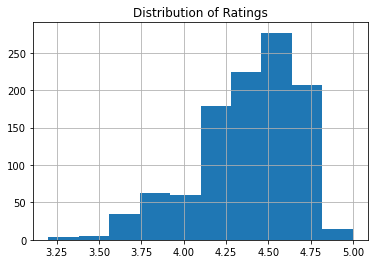

In [81]:
bay_df.Rating.hist()
plt.title('Distribution of Ratings')

Here we can see that restaurant ratings are slightly skewed towards high 4s. Important to note that Open Table limits general ratings to the range of 3-5 stars.

In [82]:
bay_df.columns

Index(['Name', 'City', 'Rating', 'Review Count', 'Promoted', 'Price',
       'Cuisine', 'Position', 'Median Household Income (USD)'],
      dtype='object')

Text(0.5, 1.0, 'HeatMap')

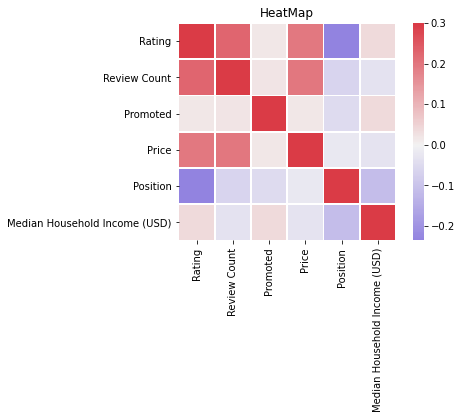

In [83]:
# Create df of quantitative features for heatmap

corr_df = bay_df[['Rating', 'Review Count', 'Promoted', 'Price', 'Position', 'Median Household Income (USD)']].corr()

cmap = sns.diverging_palette(270, 10, as_cmap=True)
sns.heatmap(corr_df, vmax=.3, center=0, cmap=cmap, square=True, linewidths=.7)
plt.title('HeatMap')

Top 20 Bar Plot for City: total = 72


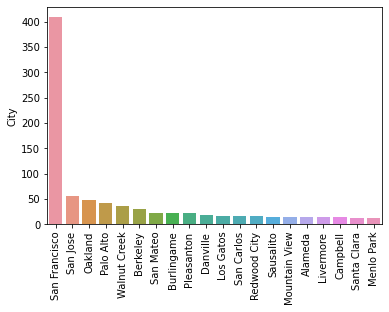

Top 20 Bar Plot for Cuisine: total = 101


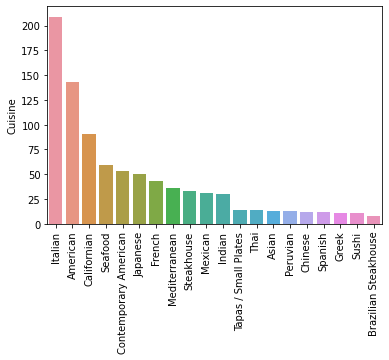

In [84]:
# Create bar plots for categorical features

df_cat = bay_df[['City', 'Cuisine']]

for i in df_cat.columns:
  count = df_cat[i].value_counts()[:20]
  print("Top 20 Bar Plot for %s: total = %d" % (i, len(df_cat[i].value_counts())))
  plot = sns.barplot(x = count.index, y = count)
  plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
  plt.show()

In [85]:
# df of average ratings for 20 most popular cuisines

cuisine_20 = np.array(bay_df['Cuisine'].value_counts()[:20].index)
cuisine20_df = bay_df[['Cuisine', 'Rating']][bay_df['Cuisine'].isin(cuisine_20)]

# df of average ratings for 20 most popular cities

city_20 = np.array(bay_df['City'].value_counts()[:20].index)
city20_df = bay_df[['City', 'Rating']][bay_df['City'].isin(city_20)]

Unsurprisingly, San Francisco hosts more OpenTable-registered restaurants than any other bay area city. Italian and American cuisines lead.

In [86]:
# pivot table for 20 most popular cuisines

pd.pivot_table(cuisine20_df, index = 'Cuisine', values = 'Rating').sort_values(by='Rating')

,Rating
Cuisine,
Asian,4.123077
Mexican,4.206452
Indian,4.206667
Peruvian,4.284615
American,4.298601
Thai,4.314286
Brazilian Steakhouse,4.325000
Seafood,4.359322
Californian,4.359341


In [87]:
# pivot table for 20 most popular cities

pd.pivot_table(city20_df, index = 'City', values = 'Rating').sort_values(by='Rating')

,Rating
City,
Livermore,4.240000
Pleasanton,4.259091
Berkeley,4.266667
Campbell,4.328571
San Jose,4.334545
Oakland,4.339583
Burlingame,4.360870
Walnut Creek,4.364865
San Carlos,4.368750


In [88]:
bay_df.columns

Index(['Name', 'City', 'Rating', 'Review Count', 'Promoted', 'Price',
       'Cuisine', 'Position', 'Median Household Income (USD)'],
      dtype='object')

In [89]:
pivots = ['Promoted', 'Price']
for p in pivots:
  print(p)
  print(pd.pivot_table(bay_df, index=p, values = 'Rating').sort_values('Rating'))

Promoted
            Rating
Promoted          
0.0       4.374528
1.0       4.433333
Price
         Rating
Price          
2.0    4.326786
3.0    4.448896
4.0    4.487500
